In [412]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

## NUTS2

### View data tendencies by region in Labour data

In [413]:
# Load the data of labour 

labour_NUTS2_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
labour_NUTS2_df.head(100)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,11,Norte,2,2019,119432,Total labour force in agriculture
1,11,Norte,2,2019,93339,Family labour force
2,11,Norte,2,2019,50025,Holder
3,11,Norte,2,2019,28116,Spouse
4,11,Norte,2,2019,15198,Other family members
...,...,...,...,...,...,...
58,30,Região Autónoma da Madeira,2,2019,1927,Other family members
59,30,Região Autónoma da Madeira,2,2019,1538,Non-family labour force
60,30,Região Autónoma da Madeira,2,2019,716,Regular
61,30,Região Autónoma da Madeira,2,2019,766,Non-regular


In [414]:
# Create a list of the region_name

labour_NUTS2_df_list = labour_NUTS2_df['region_name'].unique().tolist()
print(labour_NUTS2_df_list)



['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo', 'Região Autónoma dos Açores ', 'Região Autónoma da Madeira ']


C:\Users\cespe\AppData\Local\Temp\ipykernel_18996\1065381294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')


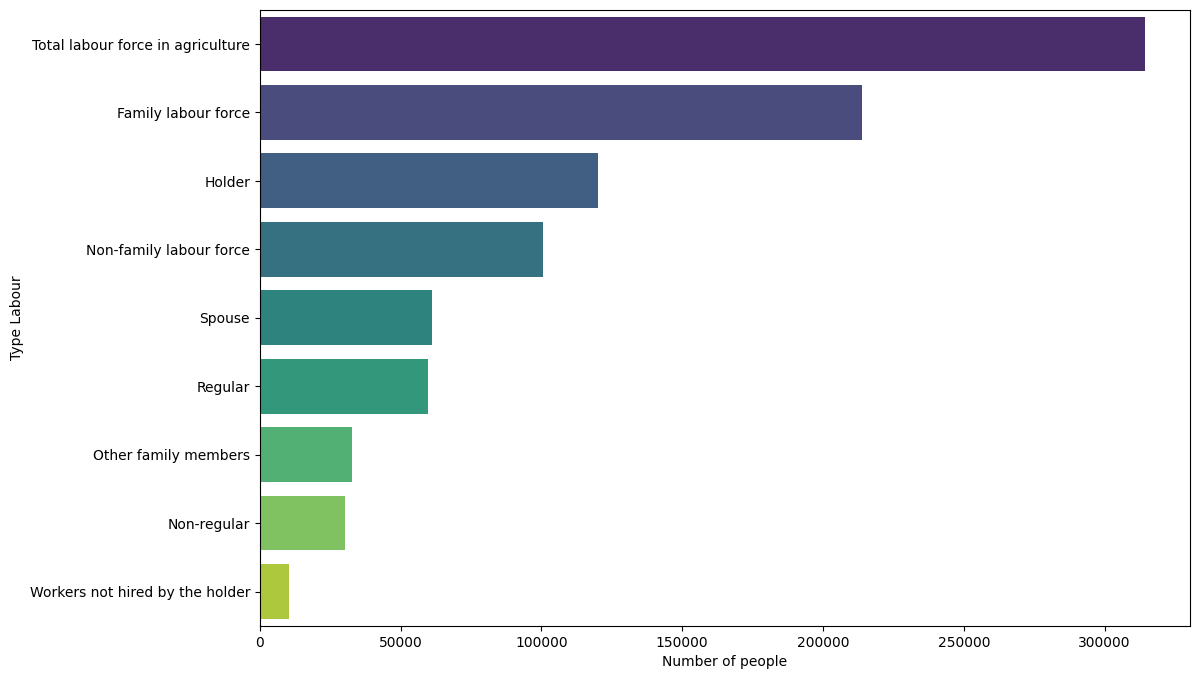

In [415]:

labour_2019_df = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Sumar valores por tipo de labor
labour_sum = labour_2019_df.groupby('ltn.type_labour')['l.value'].sum().reset_index()

# Ordenar los datos para una mejor visualización
labour_sum = labour_sum.sort_values(by='l.value', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')
plt.xlabel('Number of people')
plt.ylabel('Type Labour')
plt.title('')
plt.show()

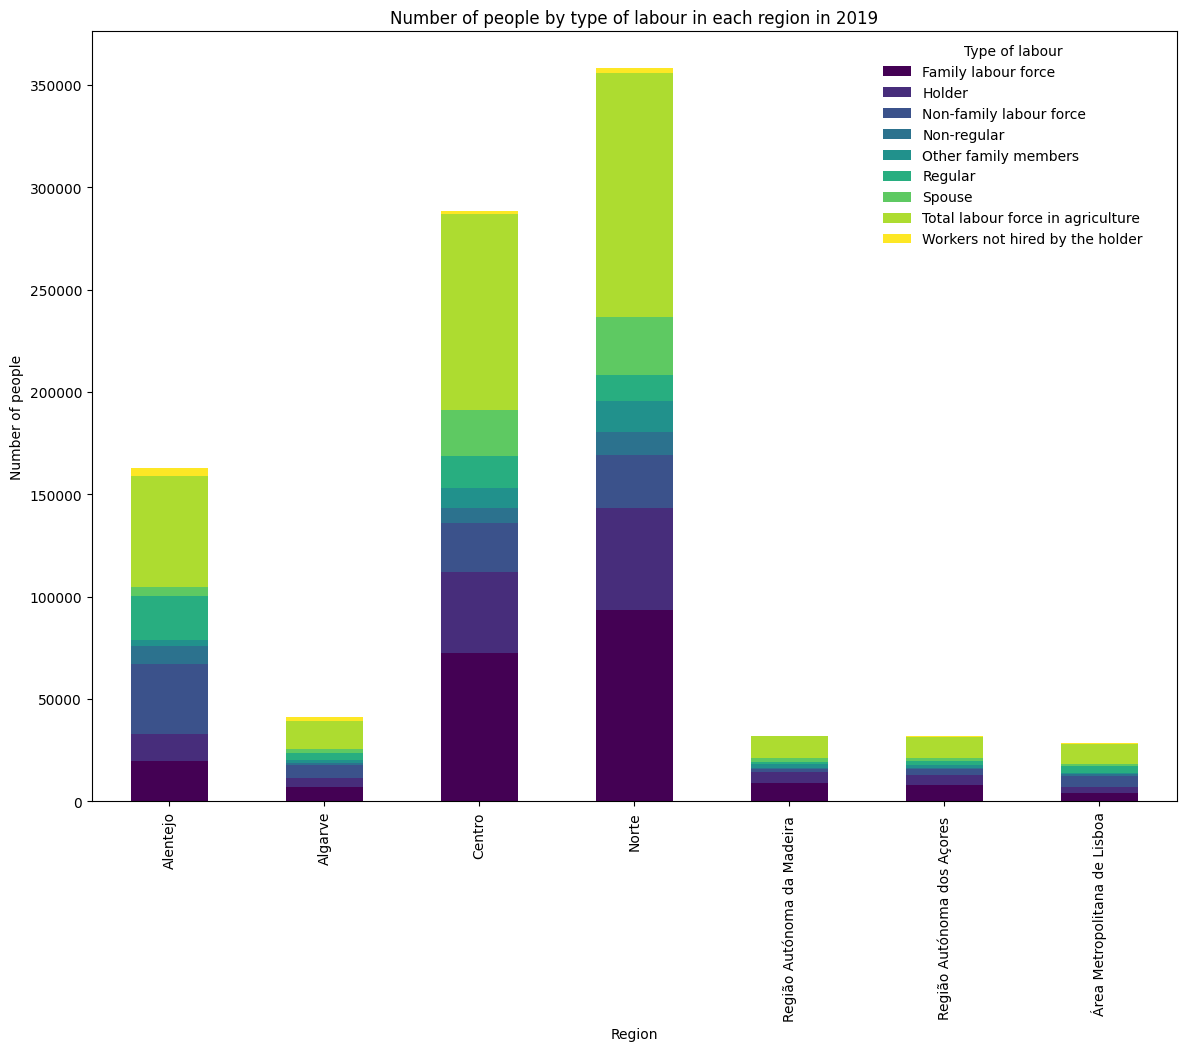

In [416]:
# Sum values by region and type of labour
labour_sum_region = labour_2019_df.groupby(['region_name', 'ltn.type_labour'])['l.value'].sum().unstack().fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_sum_region.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Region')
ax.set_ylabel('Number of people')
ax.set_title('Number of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(0.98, 1), loc='upper right', frameon=False)

plt.show()

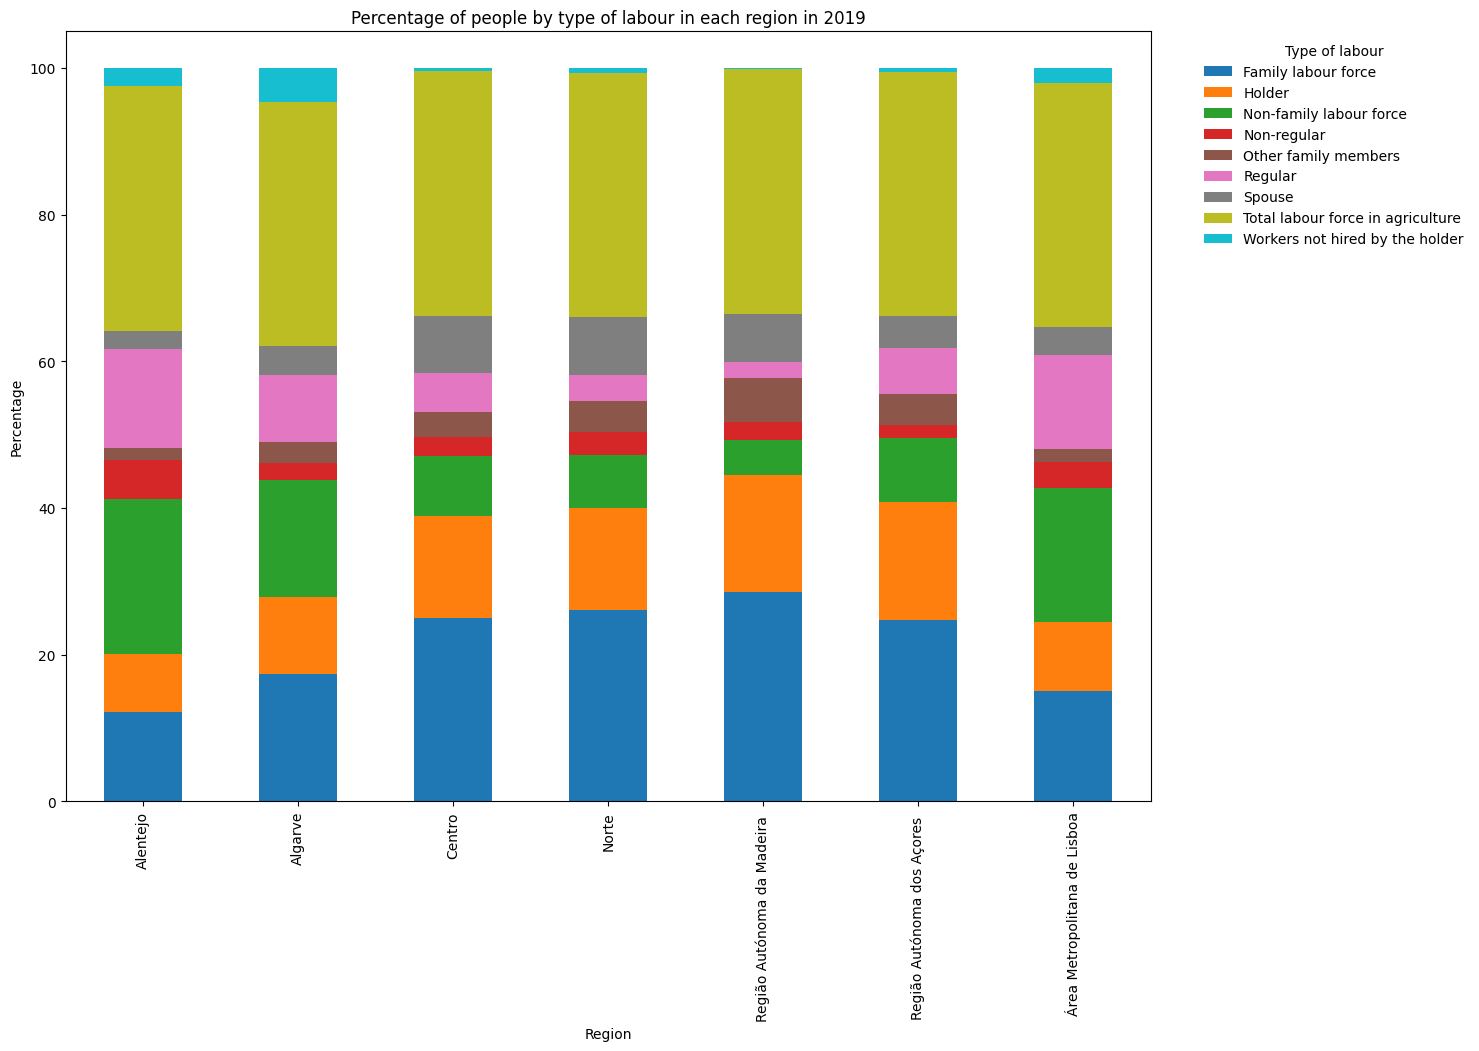

In [417]:

# Calculate the total labor force per region
total_labour_per_region = labour_2019_df.groupby('region_name')['l.value'].transform('sum')

# Calculate the percentage of each labor type within each region
labour_2019_df['percentage'] = (labour_2019_df['l.value'] / total_labour_per_region) * 100

# Pivot the table for easier plotting
labour_pivot = labour_2019_df.pivot_table(values='percentage', index='region_name', columns='ltn.type_labour', fill_value=0)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(1.3, 1), loc='upper right', frameon=False)

plt.show()

In [418]:
# Verify the calculations of the %
labour_pivot = pd.DataFrame(labour_pivot)
labour_pivot.head()

ltn.type_labour,Family labour force,Holder,Non-family labour force,Non-regular,Other family members,Regular,Spouse,Total labour force in agriculture,Workers not hired by the holder
region_name,,,,,,,,,
Alentejo,12.181876,7.970259,21.151253,5.272030,1.660496,13.428627,2.551120,33.333129,2.451209
Algarve,17.332362,10.532070,16.000972,2.327502,2.798834,9.122935,4.001458,33.333333,4.550534
Centro,25.068185,13.827616,8.265033,2.510111,3.443735,5.302319,7.796835,33.333218,0.452950
Norte,26.050880,13.961959,7.282267,3.122008,4.241756,3.492932,7.847165,33.333426,0.667606
Região Autónoma da Madeira,28.532634,15.972157,4.800699,2.390985,6.014920,2.234916,6.548678,33.330212,0.174798


In [419]:
# Obtain basic statistic of each region
labour_pivot.describe()

ltn.type_labour,Family labour force,Holder,Non-family labour force,Non-regular,Other family members,Regular,Spouse,Total labour force in agriculture,Workers not hired by the holder
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,21.279771,12.551885,12.053323,3.000986,3.455718,7.505444,5.273114,33.332688,1.547071
std,6.301142,3.254780,6.300936,1.139068,1.523775,4.382481,2.105713,0.001173,1.579338
min,12.181876,7.970259,4.800699,1.868982,1.660496,2.234916,2.551120,33.330212,0.174798
25%,16.207933,9.968251,7.773650,2.359244,2.323754,4.397625,3.917679,33.332648,0.486056
50%,24.708955,13.827616,8.624379,2.510111,3.443735,6.236234,4.332641,33.333218,0.667606
75%,25.559532,14.967058,17.124816,3.318646,4.211684,10.921539,7.172756,33.333333,2.232222
max,28.532634,16.194701,21.151253,5.272030,6.014920,13.428627,7.847165,33.333426,4.550534


### View data tendencies by region in Education data

In [420]:
# Load the data of labour 

education_NUTS2_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
education_NUTS2_df.fillna('None', inplace=True)
education_NUTS2_df.head(100)



,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level
0,11,Norte,2,2019,257718,Total
1,11,Norte,2,2019,31554,None
2,11,Norte,2,2019,161233,Basic
3,11,Norte,2,2019,35410,Secondary / post-secondary
4,11,Norte,2,2019,29521,Superior
5,15,Algarve,2,2019,27522,Total
6,15,Algarve,2,2019,3357,None
7,15,Algarve,2,2019,16943,Basic
8,15,Algarve,2,2019,4028,Secondary / post-secondary
9,15,Algarve,2,2019,3194,Superior


In [421]:

def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS2_df[(education_NUTS2_df['NutsID'] == id) & (education_NUTS2_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS2_df_no_totals = education_NUTS2_df[education_NUTS2_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS2_df_no_totals['ed_level_perc'] = education_NUTS2_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS2_df_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,ed_level_perc
1,11,Norte,2,2019,31554,None,12.243615
2,11,Norte,2,2019,161233,Basic,62.561792
3,11,Norte,2,2019,35410,Secondary / post-secondary,13.739824
4,11,Norte,2,2019,29521,Superior,11.454768
6,15,Algarve,2,2019,3357,None,12.197515


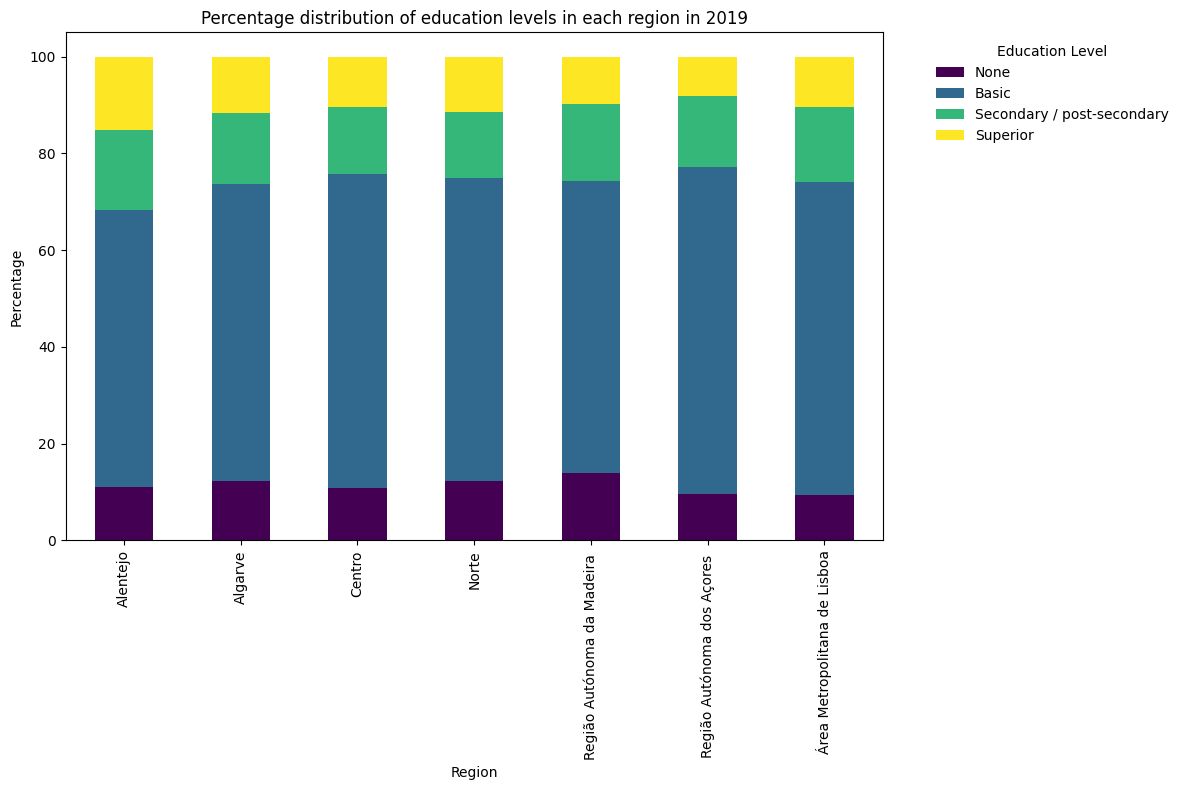

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivote de la tabla para facilitar la visualización
education_pivot = education_NUTS2_df_no_totals.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level')

# Ordenar las columnas para el gráfico
education_pivot = education_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
education_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Personalizar el gráfico
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of education levels in each region in 2019')

# Ajustar la leyenda
legend = ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [423]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar las regiones continentales y las regiones insulares
continent_regions = ['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo']
island_regions = ['Região Autónoma dos Açores', 'Região Autónoma da Madeira']

# Filtrar los datos por regiones continentales e islas
continent_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(continent_regions)]
island_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(island_regions)]

island_df.head()


,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,ed_level_perc
26,20,Região Autónoma dos Açores,2,2019,2819,None,9.672992
27,20,Região Autónoma dos Açores,2,2019,19643,Basic,67.402121
28,20,Região Autónoma dos Açores,2,2019,4333,Secondary / post-secondary,14.868064
29,20,Região Autónoma dos Açores,2,2019,2348,Superior,8.056823
31,30,Região Autónoma da Madeira,2,2019,5184,None,14.036988


In [424]:
# Pivote de la tabla para continent_df
continent_pivot = continent_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivote de la tabla para island_df
island_pivot = island_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# See the results to analyze on text 
island_pivot.head()

el.education_level,Basic,None,Secondary / post-secondary,Superior
region_name,,,,
Região Autónoma da Madeira,60.309767,14.036988,15.748287,9.904958
Região Autónoma dos Açores,67.402121,9.672992,14.868064,8.056823


In [425]:
# See the results to analyze on text 

continent_pivot.head()

el.education_level,Basic,None,Secondary / post-secondary,Superior
region_name,,,,
Alentejo,57.221870,11.065790,16.442262,15.270078
Algarve,61.561660,12.197515,14.635564,11.605261
Centro,64.779799,10.904719,13.935709,10.379774
Norte,62.561792,12.243615,13.739824,11.454768
Área Metropolitana de Lisboa,64.650647,9.486137,15.504621,10.358595


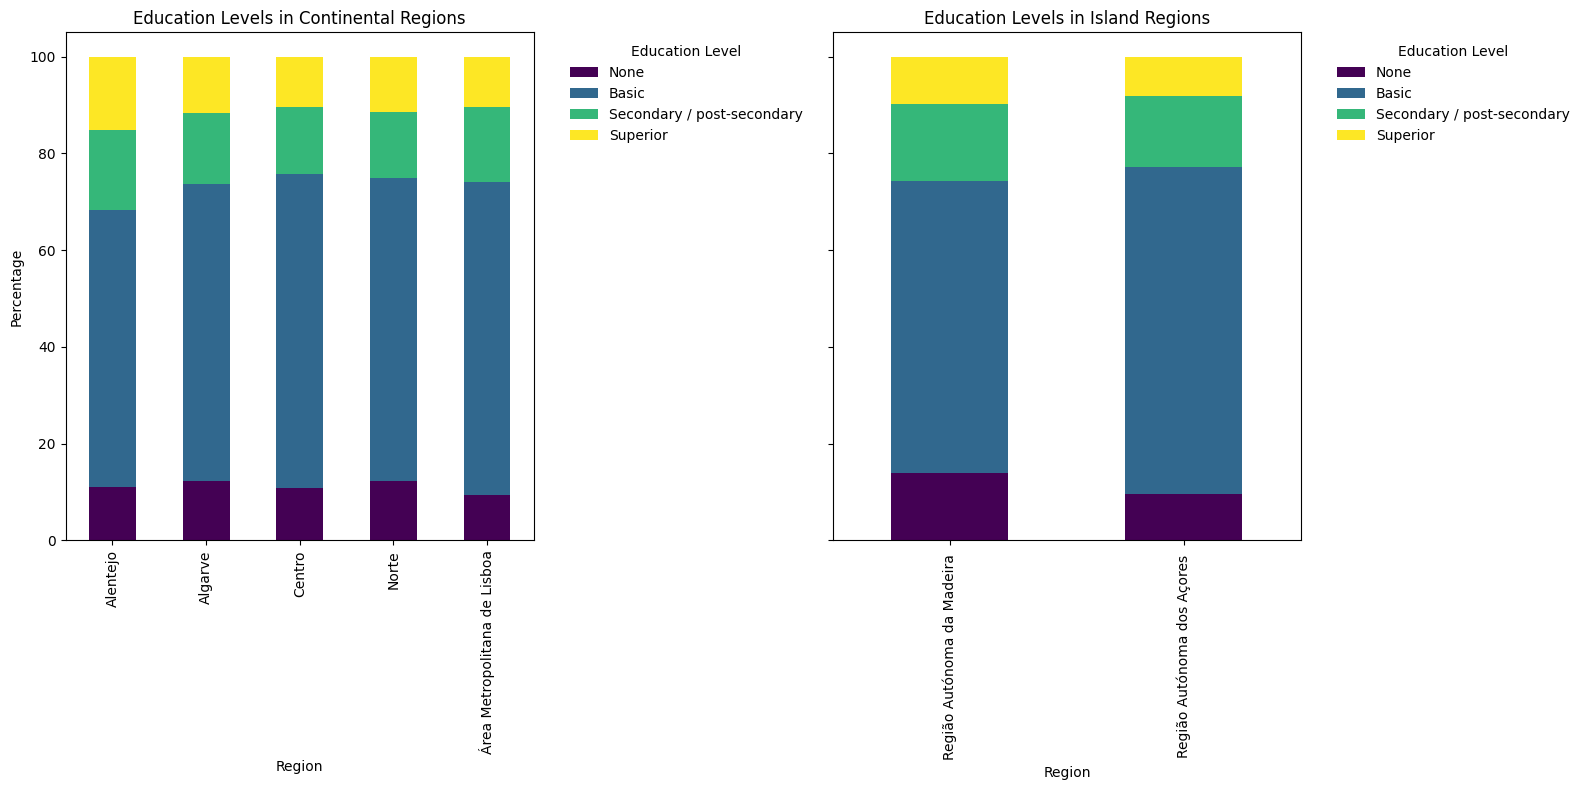

In [426]:
# Ordenar las columnas para el gráfico
continent_pivot = continent_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]
island_pivot = island_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas para regiones continentales
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

continent_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Education Levels in Continental Regions')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Percentage')

# Crear el gráfico de barras apiladas para regiones insulares
island_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Education Levels in Island Regions')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Percentage')

# Ajustar la leyenda
axes[0].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
axes[1].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


### Compare the relation between education and labour 

In [427]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
education_NUTS2_df_no_totals['region_name'] = education_NUTS2_df_no_totals['region_name'].str.strip()
labour_NUTS2_df['region_name'] = labour_NUTS2_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
education_2019 = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['e.year'] == 2019]
labour_2019 = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
education_pivot = education_2019.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='l.value', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([education_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

                                Basic       None  Secondary / post-secondary  \
region_name                                                                    
Alentejo                    57.221870  11.065790                   16.442262   
Algarve                     61.561660  12.197515                   14.635564   
Centro                      64.779799  10.904719                   13.935709   
Norte                       62.561792  12.243615                   13.739824   
Região Autónoma da Madeira  60.309767  14.036988                   15.748287   

                             Superior  Family labour force   Holder  \
region_name                                                           
Alentejo                    15.270078              19874.0  13003.0   
Algarve                     11.605261               7134.0   4335.0   
Centro                      10.379774              72335.0  39900.0   
Norte                       11.454768              93339.0  50025.0   
Região Autóno

                                      Basic      None  \
Basic                              1.000000 -0.573378   
None                              -0.573378  1.000000   
Secondary / post-secondary        -0.556555 -0.008178   
Superior                          -0.851510  0.149315   
Family labour force                0.077148  0.143201   
Holder                             0.061817  0.130264   
Non-family labour force           -0.465304 -0.030949   
Non-regular                       -0.329876  0.084087   
Other family members               0.061987  0.196074   
Regular                           -0.468306 -0.105872   
Spouse                             0.110088  0.138317   
Total labour force in agriculture -0.073800  0.104129   
Workers not hired by the holder   -0.680340  0.042533   

                                   Secondary / post-secondary  Superior  \
Basic                                               -0.556555 -0.851510   
None                                               

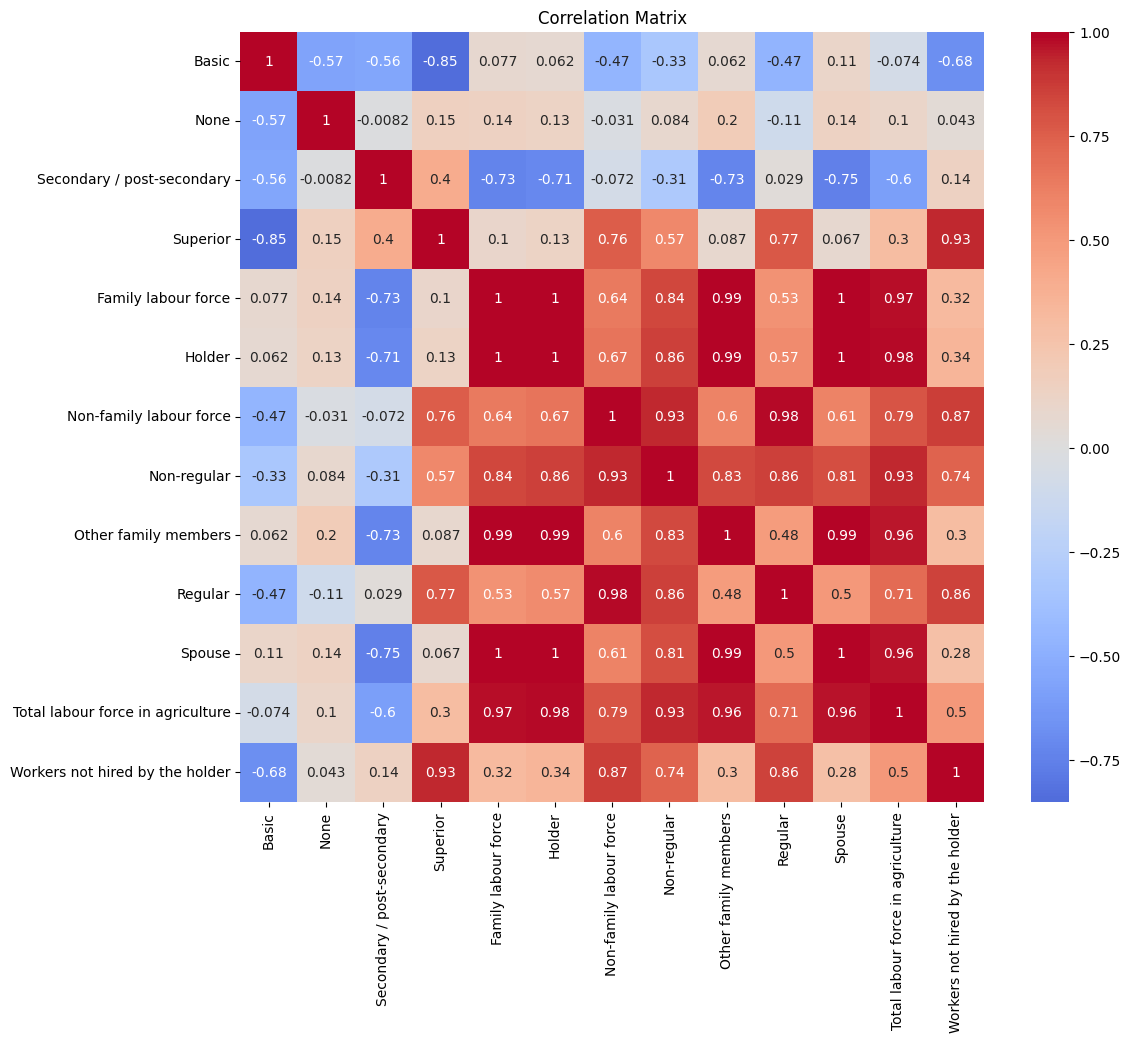

In [428]:
# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## NUTS4

### View data tendencies by region in Labour data

In [429]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
labour_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force
2,1111601,Arcos de Valdevez,4,2019,1046,Holder
3,1111601,Arcos de Valdevez,4,2019,626,Spouse
4,1111601,Arcos de Valdevez,4,2019,263,Other family members
...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members
2768,3003201,Porto Santo,4,2019,21,Non-family labour force
2769,3003201,Porto Santo,4,2019,17,Regular
2770,3003201,Porto Santo,4,2019,4,Non-regular


In [430]:
# Create a list of the region_name

labour_NUTS4_df_list = labour_NUTS4_df['region_name'].unique().tolist()
print(labour_NUTS4_df_list)

print(len(labour_NUTS4_df_list))


['Arcos de Valdevez', 'Caminha', 'Melgaço', 'Monção', 'Paredes de Coura', 'Ponte da Barca', 'Ponte de Lima', 'Valença', 'Viana do Castelo', 'Vila Nova de Cerveira', 'Amares', 'Barcelos', 'Braga', 'Esposende', 'Terras de Bouro', 'Vila Verde', 'Cabeceiras de Basto', 'Fafe', 'Guimarães', 'Póvoa de Lanhoso', 'Vieira do Minho', 'Vila Nova de Famalicão', 'Vizela', 'Mondim de Basto', 'Arouca', 'Espinho', 'Santa Maria da Feira', 'Oliveira de Azeméis', 'São João da Madeira', 'Vale de Cambra', 'Gondomar', 'Maia', 'Matosinhos', 'Paredes', 'Porto', 'Póvoa de Varzim', 'Santo Tirso', 'Valongo', 'Vila do Conde', 'Vila Nova de Gaia', 'Trofa', 'Boticas', 'Chaves', 'Montalegre', 'Ribeira de Pena', 'Valpaços', 'Vila Pouca de Aguiar', 'Castelo de Paiva', 'Celorico de Basto', 'Amarante', 'Baião', 'Felgueiras', 'Lousada', 'Marco de Canaveses', 'Paços de Ferreira', 'Penafiel', 'Cinfães', 'Resende', 'Carrazeda de Ansiães', 'Freixo de Espada à Cinta', 'Torre de Moncorvo', 'Vila Nova de Foz Côa', 'Alijó', 'Mesã

In [431]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS4_df.head(3000)


,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte
...,...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members,Madeira
2768,3003201,Porto Santo,4,2019,21,Non-family labour force,Madeira
2769,3003201,Porto Santo,4,2019,17,Regular,Madeira
2770,3003201,Porto Santo,4,2019,4,Non-regular,Madeira


In [432]:
# Calculate the total labor force per region
total_labour_per_region_nuts4 = labour_NUTS4_df.groupby('region_name')['l.value'].transform('sum')

# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage'] = (labour_NUTS4_df['l.value'] / total_labour_per_region_nuts4) * 100

labour_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2,percentage
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte,33.338658
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,30.910543
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,16.709265
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,10.000000
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,4.201278
...,...,...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members,Madeira,3.886010
2768,3003201,Porto Santo,4,2019,21,Non-family labour force,Madeira,5.440415
2769,3003201,Porto Santo,4,2019,17,Regular,Madeira,4.404145
2770,3003201,Porto Santo,4,2019,4,Non-regular,Madeira,1.036269


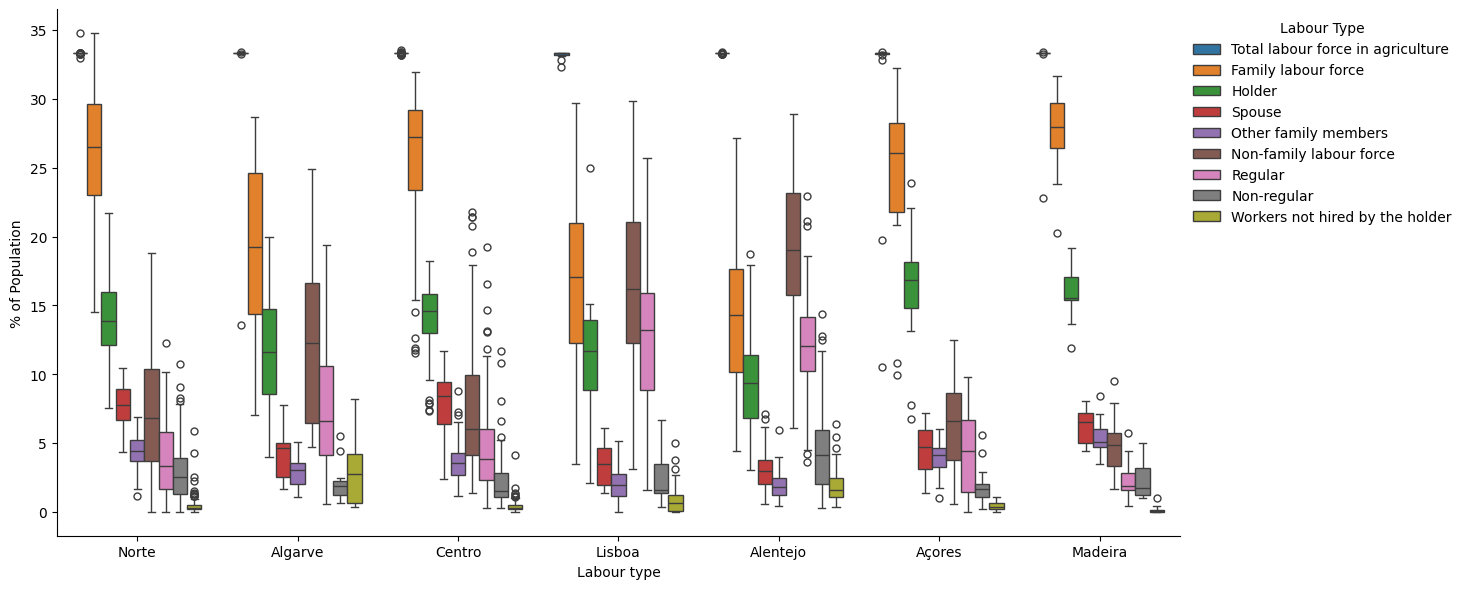

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=labour_NUTS4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="percentage", # Variable on y-axis: percentage
    hue="ltn.type_labour", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Labour Type', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()


### View data tendencies by region in education data

In [434]:
education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
education_NUTS4_df.fillna('None', inplace=True)
education_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level
0,1111601,Arcos de Valdevez,4,2019,4512,Total
1,1111602,Caminha,4,2019,968,Total
2,1111603,Melgaço,4,2019,2360,Total
3,1111604,Monção,4,2019,4341,Total
4,1111605,Paredes de Coura,4,2019,1995,Total
...,...,...,...,...,...,...
1535,3003107,Ribeira Brava,4,2019,265,Superior
1536,3003108,Santa Cruz,4,2019,379,Superior
1537,3003109,Santana,4,2019,374,Superior
1538,3003110,São Vicente,4,2019,266,Superior


In [435]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
education_NUTS4_df['region_name_nuts2'] = education_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
education_NUTS4_df.head(1000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte
...,...,...,...,...,...,...,...
995,11D1807,Moimenta da Beira,4,2019,269,Secondary / post-secondary,Norte
996,11D1812,Penedono,4,2019,204,Secondary / post-secondary,Norte
997,11D1815,São João da Pesqueira,4,2019,599,Secondary / post-secondary,Norte
998,11D1818,Sernancelhe,4,2019,271,Secondary / post-secondary,Norte


In [436]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS4_df[(education_NUTS4_df['NutsID'] == id) & (education_NUTS4_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS4_df_no_totals = education_NUTS4_df[education_NUTS4_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS4_df_no_totals['ed_level_perc'] = education_NUTS4_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS4_df_no_totals.head(1000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.991135
309,1111602,Caminha,4,2019,141,None,Norte,14.566116
310,1111603,Melgaço,4,2019,346,None,Norte,14.661017
311,1111604,Monção,4,2019,616,None,Norte,14.190279
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.190476
...,...,...,...,...,...,...,...,...
1303,11D1807,Moimenta da Beira,4,2019,181,Superior,Norte,8.846530
1304,11D1812,Penedono,4,2019,171,Superior,Norte,11.593220
1305,11D1815,São João da Pesqueira,4,2019,494,Superior,Norte,12.122699
1306,11D1818,Sernancelhe,4,2019,186,Superior,Norte,9.877854


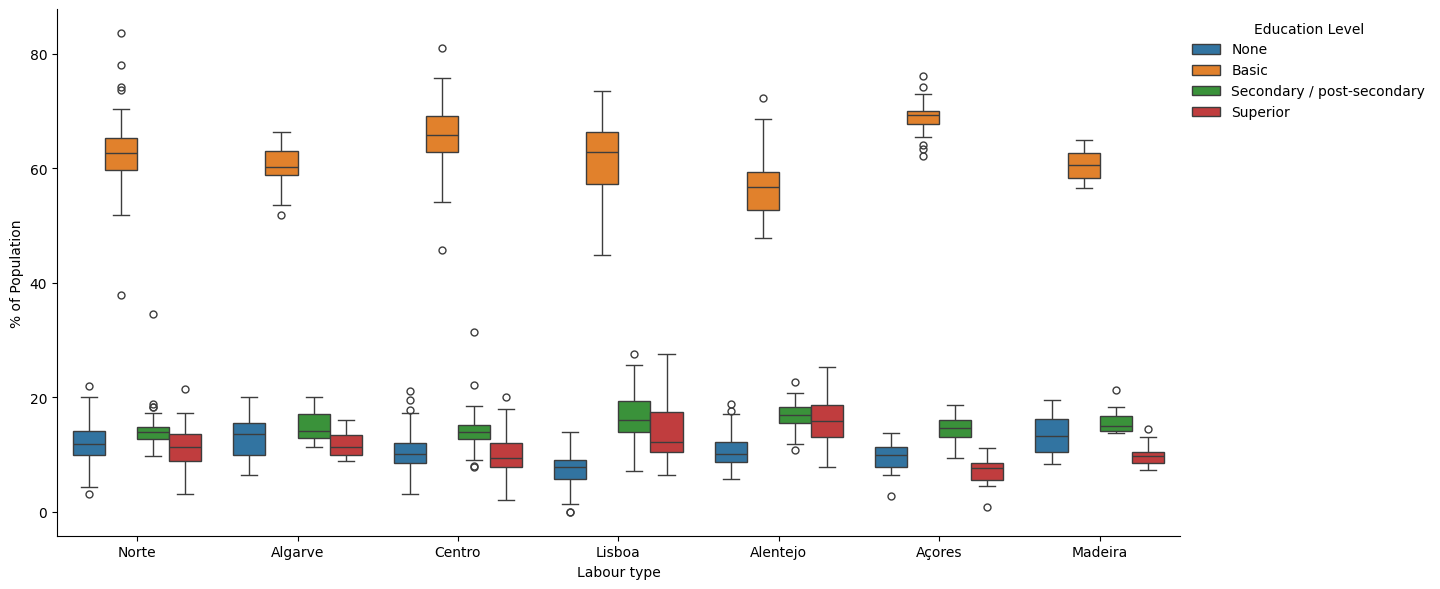

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=education_NUTS4_df_no_totals, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="ed_level_perc", # Variable on y-axis: percentage
    hue="el.education_level", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Education Level', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()

### Compare the relation between education and labour 

In [438]:
labour_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2,percentage
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte,33.338658
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,30.910543
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,16.709265
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,10.000000
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,4.201278
...,...,...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members,Madeira,3.886010
2768,3003201,Porto Santo,4,2019,21,Non-family labour force,Madeira,5.440415
2769,3003201,Porto Santo,4,2019,17,Regular,Madeira,4.404145
2770,3003201,Porto Santo,4,2019,4,Non-regular,Madeira,1.036269


In [452]:
#  Subset the df by selecting the environmental variables and the species richness columns
labour_regions_verification = labour_NUTS4_df[["region_name"]]


combined_df_Nuts4_filter_region_list_lab = labour_regions_verification['region_name'].unique().tolist()
print(combined_df_Nuts4_filter_region_list_lab)
print(len(combined_df_Nuts4_filter_region_list_lab))

['Arcos de Valdevez', 'Caminha', 'Melgaço', 'Monção', 'Paredes de Coura', 'Ponte da Barca', 'Ponte de Lima', 'Valença', 'Viana do Castelo', 'Vila Nova de Cerveira', 'Amares', 'Barcelos', 'Braga', 'Esposende', 'Terras de Bouro', 'Vila Verde', 'Cabeceiras de Basto', 'Fafe', 'Guimarães', 'Póvoa de Lanhoso', 'Vieira do Minho', 'Vila Nova de Famalicão', 'Vizela', 'Mondim de Basto', 'Arouca', 'Espinho', 'Santa Maria da Feira', 'Oliveira de Azeméis', 'São João da Madeira', 'Vale de Cambra', 'Gondomar', 'Maia', 'Matosinhos', 'Paredes', 'Porto', 'Póvoa de Varzim', 'Santo Tirso', 'Valongo', 'Vila do Conde', 'Vila Nova de Gaia', 'Trofa', 'Boticas', 'Chaves', 'Montalegre', 'Ribeira de Pena', 'Valpaços', 'Vila Pouca de Aguiar', 'Castelo de Paiva', 'Celorico de Basto', 'Amarante', 'Baião', 'Felgueiras', 'Lousada', 'Marco de Canaveses', 'Paços de Ferreira', 'Penafiel', 'Cinfães', 'Resende', 'Carrazeda de Ansiães', 'Freixo de Espada à Cinta', 'Torre de Moncorvo', 'Vila Nova de Foz Côa', 'Alijó', 'Mesã

In [440]:
education_NUTS4_df_no_totals.head(3000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.991135
309,1111602,Caminha,4,2019,141,None,Norte,14.566116
310,1111603,Melgaço,4,2019,346,None,Norte,14.661017
311,1111604,Monção,4,2019,616,None,Norte,14.190279
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.190476
...,...,...,...,...,...,...,...,...
1535,3003107,Ribeira Brava,4,2019,265,Superior,Madeira,7.354982
1536,3003108,Santa Cruz,4,2019,379,Superior,Madeira,9.952731
1537,3003109,Santana,4,2019,374,Superior,Madeira,9.631728
1538,3003110,São Vicente,4,2019,266,Superior,Madeira,9.662187


In [451]:
#  Subset the df by selecting the environmental variables and the species richness columns
education_regions_verification = education_NUTS4_df_no_totals[["region_name"]]


combined_df_Nuts4_filter_region_list_edu = education_regions_verification['region_name'].unique().tolist()
print(combined_df_Nuts4_filter_region_list_edu)
print(len(combined_df_Nuts4_filter_region_list_edu))

['Arcos de Valdevez', 'Caminha', 'Melgaço', 'Monção', 'Paredes de Coura', 'Ponte da Barca', 'Ponte de Lima', 'Valença', 'Viana do Castelo', 'Vila Nova de Cerveira', 'Amares', 'Barcelos', 'Braga', 'Esposende', 'Terras de Bouro', 'Vila Verde', 'Cabeceiras de Basto', 'Fafe', 'Guimarães', 'Póvoa de Lanhoso', 'Vieira do Minho', 'Vila Nova de Famalicão', 'Vizela', 'Mondim de Basto', 'Arouca', 'Espinho', 'Santa Maria da Feira', 'Oliveira de Azeméis', 'São João da Madeira', 'Vale de Cambra', 'Gondomar', 'Maia', 'Matosinhos', 'Paredes', 'Porto', 'Póvoa de Varzim', 'Santo Tirso', 'Valongo', 'Vila do Conde', 'Vila Nova de Gaia', 'Trofa', 'Boticas', 'Chaves', 'Montalegre', 'Ribeira de Pena', 'Valpaços', 'Vila Pouca de Aguiar', 'Castelo de Paiva', 'Celorico de Basto', 'Amarante', 'Baião', 'Felgueiras', 'Lousada', 'Marco de Canaveses', 'Paços de Ferreira', 'Penafiel', 'Cinfães', 'Resende', 'Carrazeda de Ansiães', 'Freixo de Espada à Cinta', 'Torre de Moncorvo', 'Vila Nova de Foz Côa', 'Alijó', 'Mesã

#### We can see that Education has 1232 registers and Labour has 2772. The best idea is obtain the mean for the percentage by region_name for each labour type and education level. 

In [459]:
import pandas as pd

# Suponiendo que ya tienes los DataFrames labour_NUTS4_df y education_NUTS4_df_no_totals

# Paso 1: Agrupar y calcular porcentajes por región para type_labour
labour_percentages = labour_NUTS4_df.groupby(['region_name', 'ltn.type_labour']).agg({'percentage': 'mean'}).reset_index()

# Paso 2: Agrupar y calcular porcentajes por región para education_level
education_percentages = education_NUTS4_df_no_totals.groupby(['region_name', 'el.education_level']).agg({'ed_level_perc': 'mean'}).reset_index()

# Ver los DataFrames de porcentajes
# print(labour_percentages.head())
# print(education_percentages.head())

# Paso 3: Unir los DataFrames por region_name
combined_df = pd.merge(labour_percentages, education_percentages, on='region_name')

# Ver el DataFrame combinado
# print(combined_df.head())

# Asegurarse de que las columnas de educación y trabajo sean claras
combined_df.rename(columns={'ltn.type_labour': 'labour_type', 'el.education_level': 'education_level'}, inplace=True)

# Paso 4: Crear una tabla pivote si es necesario para visualizar mejor
pivot_df = combined_df.pivot_table(index='region_name', columns=['labour_type', 'education_level'], values=['percentage', 'ed_level_perc'])

# Ver la tabla pivote
pivot_df.head(3006)


ed_level_perc                                        \
labour_type        Family labour force                                         
education_level                  Basic       None Secondary / post-secondary   
region_name                                                                    
Abrantes                     56.596794   7.850390                  15.536375   
Aguiar da Beira              62.986381  17.752918                  13.035019   
Alandroal                    56.846951  13.808976                  14.672037   
Albergaria-a-Velha           75.814234   8.202654                  11.580217   
Albufeira                    60.641399   9.037901                  15.918367   
...                                ...        ...                        ...   
Vouzela                      69.079940   8.798391                  13.826043   
Águeda                       72.085106   8.297872                  12.510638   
Évora                        48.085106   8.179669                  20.378251   
Ílhavo                       72.246696   3.083700                  14.977974   
Óbidos                       63.209530  11.352488                  16.678346   

                                                     \
labour_type                       Holder              
education_level      Superior      Basic       None   
region_name                                           
Abrantes            20.016441  56.596794   7.850390   
Aguiar da Beira      6.225681  62.986381  17.752918   
Alandroal           14.672037  56.846951  13.808976   
Albergaria-a-Velha   4.402895  75.814234   8.202654   
Albufeira           14.402332  60.641399   9.037901   
...                       ...        ...        ...   
Vouzela              8.295626  69.079940   8.798391   
Águeda               7.106383  72.085106   8.297872   
Évora               23.356974  48.085106   8.179669   
Ílhavo               9.691630  72.246696   3.083700   
Óbidos               8.759636  63.209530  11.352488   

                                                          \
labour_type                                                
education_level    Secondary / post-secondary   Superior   
region_name                                                
Abrantes                            15.536375  20.016441   
Aguiar da Beira                     13.035019   6.225681   
Alandroal                           14.672037  14.672037   
Albergaria-a-Velha                  11.580217   4.402895   
Albufeira                           15.918367  14.402332   
...                                       ...        ...   
Vouzela                             13.826043   8.295626   
Águeda                              12.510638   7.106383   
Évora                               20.378251  23.356974   
Ílhavo                              14.977974   9.691630   
Óbidos                              16.678346   8.759636   

                                                       ...  \
labour_type        Non-family labour force             ...   
education_level                      Basic       None  ...   
region_name                                            ...   
Abrantes                         56.596794   7.850390  ...   
Aguiar da Beira                  62.986381  17.752918  ...   
Alandroal                        56.846951  13.808976  ...   
Albergaria-a-Velha               75.814234   8.202654  ...   
Albufeira                        60.641399   9.037901  ...   
...                                    ...        ...  ...   
Vouzela                          69.079940   8.798391  ...   
Águeda                           72.085106   8.297872  ...   
Évora                            48.085106   8.179669  ...   
Ílhavo                           72.246696   3.083700  ...   
Óbidos                           63.209530  11.352488  ...   

                                   percentage             \
labour_type                            Spouse              
education_level    Secondary / post-secondary 

C:\Users\cespe\AppData\Local\Temp\ipykernel_18996\929094991.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


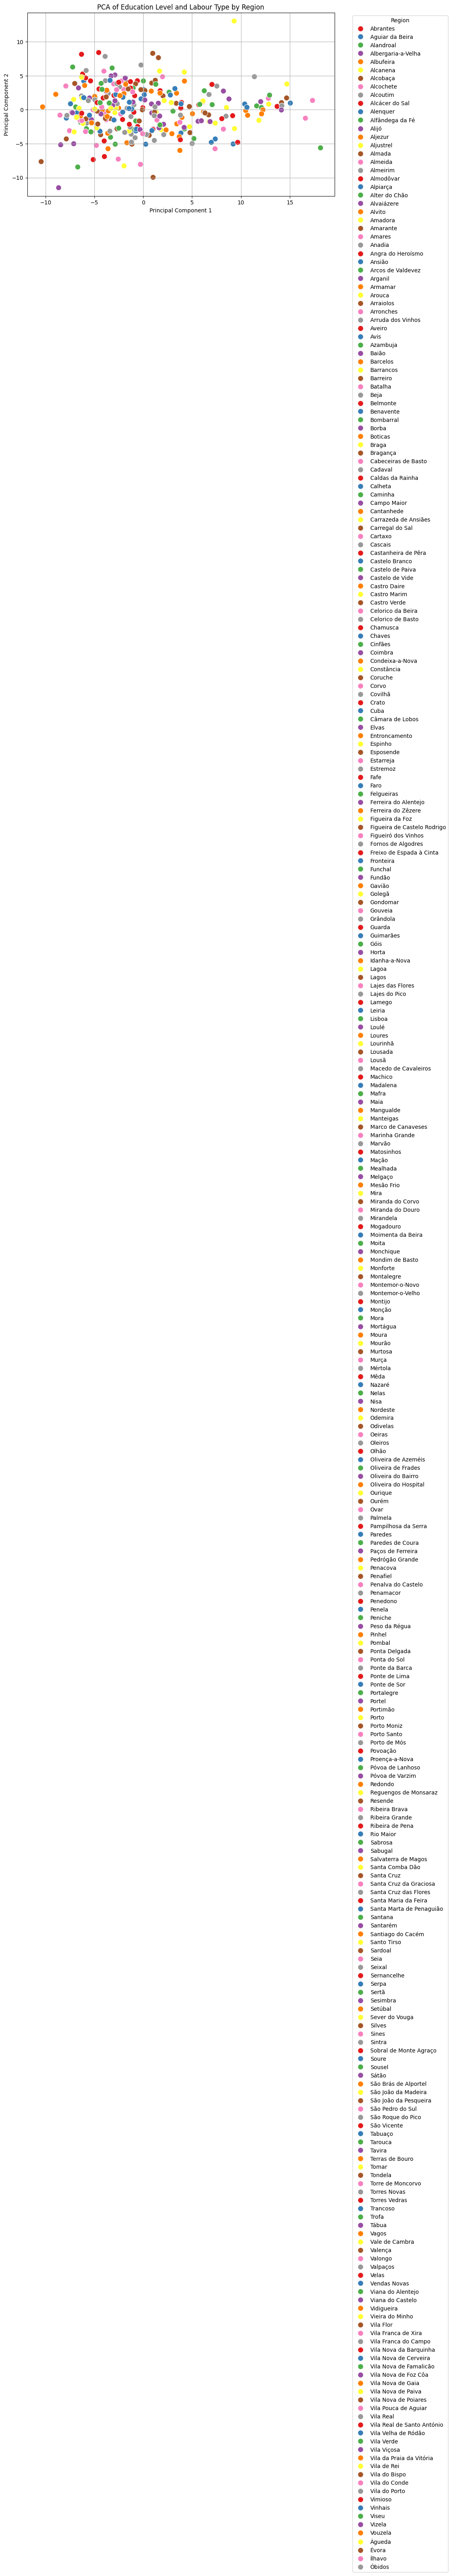

In [460]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Paso 1: Agrupar y calcular porcentajes por región para type_labour
labour_percentages = labour_NUTS4_df.groupby(['region_name', 'ltn.type_labour']).agg({'percentage': 'mean'}).reset_index()

# Paso 2: Agrupar y calcular porcentajes por región para education_level
education_percentages = education_NUTS4_df_no_totals.groupby(['region_name', 'el.education_level']).agg({'ed_level_perc': 'mean'}).reset_index()

# Paso 3: Unir los DataFrames por region_name
combined_df = pd.merge(labour_percentages, education_percentages, on='region_name')

# Asegurarse de que las columnas de educación y trabajo sean claras
combined_df.rename(columns={'ltn.type_labour': 'labour_type', 'el.education_level': 'education_level'}, inplace=True)

# Paso 4: Crear una tabla pivote para obtener una estructura adecuada para PCA
pivot_df = combined_df.pivot_table(index='region_name', columns=['labour_type', 'education_level'], values=['percentage', 'ed_level_perc'], fill_value=0)

# Aplanar la tabla pivote para obtener un DataFrame adecuado para PCA
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df.reset_index(inplace=True)

# Seleccionar solo las columnas numéricas para PCA
data_for_pca = pivot_df.drop('region_name', axis=1)

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convertir a DataFrame para facilitar la manipulación
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
principal_df['region_name'] = pivot_df['region_name']

# Graficar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='region_name', data=principal_df, palette='Set1', s=100)
plt.title('PCA of Education Level and Labour Type by Region')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()
